# Introduction to `numpy`

`NumPy` is the fundamental package for scientific computing with Python. It contains among other things:

- a powerful N-dimensional array object
- sophisticated (broadcasting) functions
- tools for integrating C/C++ and Fortran code
- useful linear algebra, Fourier transform, and random number capabilities

Besides its obvious scientific uses, NumPy can also be used as an efficient multi-dimensional container of generic data. Arbitrary data-types can be defined. This allows NumPy to seamlessly and speedily integrate with a wide variety of databases.

Library documentation: <a>http://www.numpy.org/</a>

# The base `numpy.array` object

In [1]:
import numpy as np

# declare a vector using a list as the argument
v = np.array([1., 2, 3, 4])
v

array([1., 2., 3., 4.])

In [2]:
v.shape

(4,)

In [3]:
v.ndim

1

In [4]:
v.dtype

dtype('float64')

In [5]:
w = np.array([1., 2, 3, 4], dtype='int')
w

array([1, 2, 3, 4])

In [6]:
w.dtype

dtype('int64')

In [7]:
a = np.arange(100, dtype=np.uint16)

In [8]:
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype=uint16)

In [9]:
-3 * a ** 2

array([     0,     -3,    -12,    -27,    -48,    -75,   -108,   -147,
         -192,   -243,   -300,   -363,   -432,   -507,   -588,   -675,
         -768,   -867,   -972,  -1083,  -1200,  -1323,  -1452,  -1587,
        -1728,  -1875,  -2028,  -2187,  -2352,  -2523,  -2700,  -2883,
        -3072,  -3267,  -3468,  -3675,  -3888,  -4107,  -4332,  -4563,
        -4800,  -5043,  -5292,  -5547,  -5808,  -6075,  -6348,  -6627,
        -6912,  -7203,  -7500,  -7803,  -8112,  -8427,  -8748,  -9075,
        -9408,  -9747, -10092, -10443, -10800, -11163, -11532, -11907,
       -12288, -12675, -13068, -13467, -13872, -14283, -14700, -15123,
       -15552, -15987, -16428, -16875, -17328, -17787, -18252, -18723,
       -19200, -19683, -20172, -20667, -21168, -21675, -22188, -22707,
       -23232, -23763, -24300, -24843, -25392, -25947, -26508, -27075,
       -27648, -28227, -28812, -29403], dtype=int32)

In [ ]:
a

In [10]:
b = a + 1
b

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100], dtype=uint16)

In [14]:
a is b

False

In [12]:
a += 1

In [13]:
a

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100], dtype=uint16)

**Warning**

Beware of the dimensions: a 1D array is not the same as a 2D array with 1 column

In [17]:
a1 = np.array([[1, 2, 3]])
print(a1, a1.shape, a1.ndim)

[[1 2 3]] (1, 3) 2


In [15]:
a2 = np.array([[1, 2, 3]]).T
print(a2, a2.shape, a2.ndim)

[[1]
 [2]
 [3]] (3, 1) 2


In [18]:
a2.dot(a1)

array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

In [20]:
# Declare a 2D array using a nested list as the argument
M = np.array([[1,2], [3,4], [3.14, -9.17]])
M

array([[ 1.  ,  2.  ],
       [ 3.  ,  4.  ],
       [ 3.14, -9.17]])

In [21]:
M.shape

(3, 2)

In [23]:
M.size

6

In [22]:
M.ravel()

array([ 1.  ,  2.  ,  3.  ,  4.  ,  3.14, -9.17])

In [24]:
M.ndim

2

In [25]:
# arguments: start, stop, step
x = np.arange(12).reshape(4, 3)
x

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [26]:
np.linspace(0, 10, 50)

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

In [27]:
np.logspace(0, 10, 10, base=np.e, dtype=np.int32)

array([    1,     3,     9,    28,    85,   258,   785,  2386,  7250,
       22026], dtype=int32)

<Figure size 720x432 with 0 Axes>

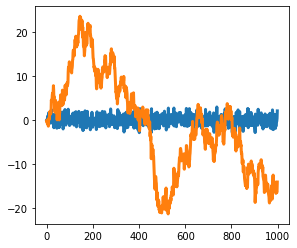

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

# Random standard Gaussian numbers
fig = plt.figure(figsize=(10, 6))
wn = np.random.randn(1000)
bm = wn.cumsum()

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(wn,lw=3)
plt.plot(bm, lw=3)

In [ ]:
np.diag(np.arange(10))

In [30]:
zozo = np.zeros((10, 10))
zozo

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
zozo.shape

In [ ]:
print(M)

In [ ]:
M[1, 1]

In [31]:
# assign new value
M[0, 0] = 7
M[1, :] = -2
M

array([[ 7.  ,  2.  ],
       [-2.  , -2.  ],
       [ 3.14, -9.17]])

In [36]:
# Warning: the next m is a **view** on M. 
# One again, no copies unless you ask for one!
m = M[0, :]
m[:] = 42
M, m


(array([[42.  , 42.  ],
        [-2.  , -2.  ],
        [ 3.14, -9.17]]), array([42., 42.]))

# Slicing

In [37]:
# slicing works just like with anything else (lists, etc.)
# notation is start:end:increment with defaults start=0, end, increment
A = np.array([1, 2, 3, 4, 5])
print(A)
print(A[::-1])
print(A[::2])
print(A[:-1])

[1 2 3 4 5]
[5 4 3 2 1]
[1 3 5]
[1 2 3 4]


In [39]:
A = np.array([[n + m * 10 for n in range(5)] for m in range(5)])
A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [40]:
print(A[1:4])

[[10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]]


In [41]:
print(A[1:4, :])

[[10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]]


In [42]:
A[1]

array([10, 11, 12, 13, 14])

In [44]:
A[:, 1]

array([ 1, 11, 21, 31, 41])

In [43]:
A[:, ::-1]

array([[ 4,  3,  2,  1,  0],
       [14, 13, 12, 11, 10],
       [24, 23, 22, 21, 20],
       [34, 33, 32, 31, 30],
       [44, 43, 42, 41, 40]])

In [45]:
print(A)

[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]]


In [46]:
row_indices = [1, 2, 4]
print(A[row_indices])

[[10 11 12 13 14]
 [20 21 22 23 24]
 [40 41 42 43 44]]


In [47]:
A[:, row_indices]

array([[ 1,  2,  4],
       [11, 12, 14],
       [21, 22, 24],
       [31, 32, 34],
       [41, 42, 44]])

Another way is through masking with an array of `bool`s

In [48]:
# index masking
B = np.arange(5)
row_mask = np.array([True, False, True, False, False])
print(B)
print(B[row_mask])

[0 1 2 3 4]
[0 2]


# Copies

Don't forget that `python` **does not make copies unless told to do so** (same as with any mutable type)

If you are not careful enough, this typically leads to a **lot of errors** and to being fired !!

In [49]:
x = np.arange(6)
y = x
x[2] = 123
y

array([  0,   1, 123,   3,   4,   5])

In [50]:
x is y

True

In [51]:
# A real copy
y = x.copy()

In [52]:
# Or equivalently (but the one above is better...)
y = np.copy(x)

In [53]:
x[0] = -12
print(x, y)

[-12   1 123   3   4   5] [  0   1 123   3   4   5]


In [54]:
x is y

False

To put values of x in y (copy values into an **existing** array) use

In [56]:
y[:] = x

**Final warning**

In the next line you copy the values of `x` into an existing array `y` (of same size...)

In [57]:
y[:] = x

While in the next line, you give another name `y` to the object with name `x`


(and actually, you should **never, never, never** write something like this)

In [58]:
y = x

# Miscellaneous stuff

## Non-numerical values

A `numpy` array can contain other things than numeric types

In [59]:
arr = np.array(['ou', 'la', 'la', "c'est", 'dur', 'python'])

In [60]:
arr.sum()

TypeError: cannot perform reduce with flexible type

In [61]:
arr.dtype

dtype('<U6')

## A matrix is no 2D array in `numpy`

We've been using only `array` or `ndarray` objects for now

The is another type: the `matrix` type

In summary: just **don't use it** (IMO) and stick with arrays

In [62]:
# Matrix VS array objects in numpy
m1 = np.matrix(np.arange(3))
m2 = np.matrix(np.arange(3))

In [63]:
a1 = np.arange(3)
a2 = np.arange(3)

In [64]:
m1 * m2

ValueError: shapes (1,3) and (1,3) not aligned: 3 (dim 1) != 1 (dim 0)

In [65]:
a1 * a2

array([0, 1, 4])

## Sparse matrices

In [74]:
from scipy.sparse import csc_matrix, csr_matrix, coo_matrix

probs = np.full(fill_value=1/4, shape=(4,))
X = np.random.multinomial(n=2, pvals=probs, size=4)
X, probs

(array([[0, 0, 2, 0],
        [1, 1, 0, 0],
        [1, 1, 0, 0],
        [0, 1, 0, 1]]), array([0.25, 0.25, 0.25, 0.25]))

In [75]:
X_coo = coo_matrix(X)
print(X_coo)
X_coo

  (0, 2)	2
  (1, 0)	1
  (1, 1)	1
  (2, 0)	1
  (2, 1)	1
  (3, 1)	1
  (3, 3)	1


<4x4 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in COOrdinate format>

In [76]:
X_coo.nnz

7

In [77]:
print(X, end='\n----\n')
print(X_coo.data, end='\n----\n')
print(X_coo.row, end='\n----\n')
print(X_coo.col, end='\n----\n')

[[0 0 2 0]
 [1 1 0 0]
 [1 1 0 0]
 [0 1 0 1]]
----
[2 1 1 1 1 1 1]
----
[0 1 1 2 2 3 3]
----
[2 0 1 0 1 1 3]
----


There is also

- `csr_matrix`: sparse rows format 
- `csc_matrix`: sparse columns format

Sparse rows is often used for machine learning: sparse features vectors

But sparse column format useful as well (e.g. coordinate gradient descent)

In [ ]:
csr_matrix()

## Bored of seing too many decimals?

In [79]:
X = np.random.randn(5, 5)
X

array([[-1.19241979, -0.44790678, -1.66699795,  0.66829459, -1.33077986],
       [-0.59616482, -0.30030056, -1.66448021, -0.47769656, -0.52012439],
       [-1.43908277, -0.23924986, -0.09157767,  0.65280664, -0.25559094],
       [ 0.44991616, -0.69927008,  1.56121374,  0.17362325, -1.18110825],
       [-0.76789713,  0.2554316 , -1.37952445, -0.18625427,  0.39694887]])

In [80]:
# All number displayed by numpy (in the current kernel) are with 3 decimals max
np.set_printoptions(precision=3)
print(X)
np.set_printoptions(precision=8)

[[-1.192 -0.448 -1.667  0.668 -1.331]
 [-0.596 -0.3   -1.664 -0.478 -0.52 ]
 [-1.439 -0.239 -0.092  0.653 -0.256]
 [ 0.45  -0.699  1.561  0.174 -1.181]
 [-0.768  0.255 -1.38  -0.186  0.397]]


## Not limited to 2D!

`numpy` arrays can have any number of dimension (hence the name `ndarray`)

In [82]:
X = np.arange(18).reshape(3, 2, 3)
X

array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]],

       [[12, 13, 14],
        [15, 16, 17]]])

In [83]:
X.shape

(3, 2, 3)

In [84]:
X.ndim

3

# Aggregations and statistics

In [85]:
A = np.arange(42).reshape(7, 6)
A

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41]])

In [86]:
A.sum()

861

In [87]:
A[:, 3].mean()

21.0

In [88]:
A.mean(axis=0)

array([18., 19., 20., 21., 22., 23.])

In [89]:
A.mean(axis=1)

array([ 2.5,  8.5, 14.5, 20.5, 26.5, 32.5, 38.5])

In [ ]:
A[:,3].std(), A[:,3].var()

In [ ]:
A[:,3].min(), A[:,3].max()

In [ ]:
A.cumsum(axis=1)

In [90]:
# sum of diagonal
A.trace()

105

# Linear Algebra

In [93]:
A = np.arange(30).reshape(6, 5)
v1 = np.arange(0, 5)
v2 = np.arange(5, 10)

In [94]:
v1

array([0, 1, 2, 3, 4])

In [95]:
v2

array([5, 6, 7, 8, 9])

In [96]:
v1 * v2

array([ 0,  6, 14, 24, 36])

## Inner products

In [97]:
# Inner product between vectors
print(v1.dot(v2))

# You can use also (but first solution is better)
print(np.dot(v1, v2))

80
80


In [ ]:
A, v1

In [ ]:
A.shape, v1.shape

In [ ]:
# Matrix-vector inner product
A.dot(v1)

In [98]:
# Transpose
A.T

array([[ 0,  5, 10, 15, 20, 25],
       [ 1,  6, 11, 16, 21, 26],
       [ 2,  7, 12, 17, 22, 27],
       [ 3,  8, 13, 18, 23, 28],
       [ 4,  9, 14, 19, 24, 29]])

In [ ]:
print(v1)
# Inline operations (same for *=, /=, -=)
v1 += 2

## Linear systems

In [100]:
A = np.array([[1,2,3], [4,5,6], [7,8,9]])
b = np.array([1,2,3])
print(A, b, sep=2 * '\n')

[[1 2 3]
 [4 5 6]
 [7 8 9]]

[1 2 3]


In [101]:
# solve a system of linear equations
x = np.linalg.solve(A, b)
x

array([-0.33333333,  0.66666667,  0.        ])

In [102]:
A.dot(x)

array([1., 2., 3.])

## Eigenvalues and eigenvectors

In [104]:
A = np.random.rand(3,3)
B = np.random.rand(3,3)

evals, evecs = np.linalg.eig(A)
evals

array([ 1.28136055, -0.14233939,  0.37394597])

In [105]:
evecs

array([[ 0.42685222,  0.70691734,  0.32667947],
       [ 0.19393917, -0.12102383, -0.90045944],
       [ 0.88328069, -0.6968652 ,  0.28714688]])

### Singular value decomposition (SVD)

Decomposes any matrix $A \in \mathbb R^{m \times n}$ as follows:
$$
A = U S V^\top
$$
where 
- $U$ and $V$ are orthonormal matrices (meaning that $U^\top U = I$ and $V^\top V = I$)
- $S$ is a diagonal matrix that contains the singular values in decreasing order

In [106]:
print(A)
U, S, V = np.linalg.svd(A)

[[0.31340317 0.11887967 0.44167085]
 [0.18994367 0.47036827 0.08627528]
 [0.93671571 0.45311829 0.72919569]]


In [ ]:
U.dot(np.diag(S)).dot(V)

In [ ]:
# U and V are indeed orthonormal
np.set_printoptions(precision=2)
print(U.T.dot(U), V.T.dot(V), sep=2 * '\n')
np.set_printoptions(precision=8)

## Exercice: the racoon SVD

- Load the racoon face picture using `scipy.misc.face()`
- Visualize the picture
- Write a function which reshapes the picture into a 2D array, and computes the best rank-r approximation of it (the prototype of the function is `compute_approx(X, r)`
- Display the different approximations for r between 5 and 100

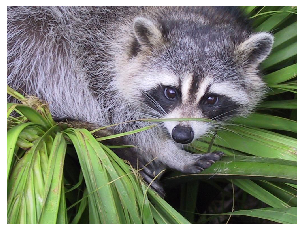

In [107]:
import numpy as np
from scipy.misc import face
import matplotlib.pyplot as plt
%matplotlib inline

X = face()
plt.imshow(X)
_ = plt.axis('off')

In [112]:
X

array([[[121, 112, 131],
        [138, 129, 148],
        [153, 144, 165],
        ...,
        [119, 126,  74],
        [131, 136,  82],
        [139, 144,  90]],

       [[ 89,  82, 100],
        [110, 103, 121],
        [130, 122, 143],
        ...,
        [118, 125,  71],
        [134, 141,  87],
        [146, 153,  99]],

       [[ 73,  66,  84],
        [ 94,  87, 105],
        [115, 108, 126],
        ...,
        [117, 126,  71],
        [133, 142,  87],
        [144, 153,  98]],

       ...,

       [[ 87, 106,  76],
        [ 94, 110,  81],
        [107, 124,  92],
        ...,
        [120, 158,  97],
        [119, 157,  96],
        [119, 158,  95]],

       [[ 85, 101,  72],
        [ 95, 111,  82],
        [112, 127,  96],
        ...,
        [121, 157,  96],
        [120, 156,  94],
        [120, 156,  94]],

       [[ 85, 101,  74],
        [ 97, 113,  84],
        [111, 126,  97],
        ...,
        [120, 156,  95],
        [119, 155,  93],
        [118, 154,  92]]

In [113]:
def compute_approx(X: np.ndarray, r: int):
    """Computes the best rank-r approximation of X using SVD.
    We expect X to the 3D array corresponding to a color image, that we 
    reduce to a 2D one to apply SVD (no broadcasting).
    
    Parameters
    ----------
    X : `np.ndarray`, shape=(n_rows, n_cols, 3)
        The input 3D ndarray
    
    r : `int`
        The desired rank
        
    Return
    ------
    output : `np.ndarray`, shape=(n_rows, n_cols, 3)
        The best rank-r approximation of X
    """
    n_rows, n_cols, n_channels = X.shape
    # Reshape X to a 2D array
    X_reshape = X.reshape(n_rows, n_cols * n_channels)
    # Compute SVD
    U, S, V = np.linalg.svd(X_reshape, full_matrices=False)
    # Keep only the top r first singular values
    S[r:] = 0
    # Compute the approximation
    X_reshape_r = U.dot(np.diag(S)).dot(V)
    # Put it between 0 and 255 again and cast to integer type
    return X_reshape_r.clip(min=0, max=255).astype('int')\
        .reshape(n_rows, n_cols, n_channels)

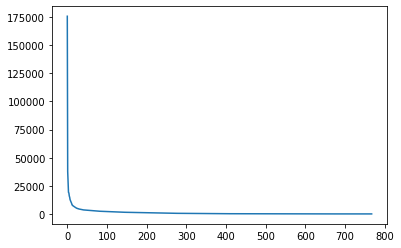

In [115]:
n_rows, n_cols, n_channels = X.shape
# Reshape X to a 2D array
X_reshape = X.reshape(n_rows, n_cols * n_channels)
# Compute SVD
U, S, V = np.linalg.svd(X_reshape, full_matrices=False)
plt.plot(S, label='Spectrum of the racoon')

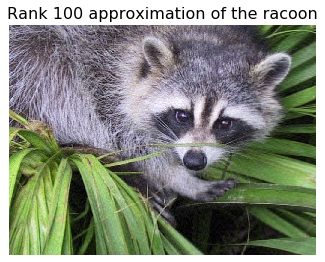

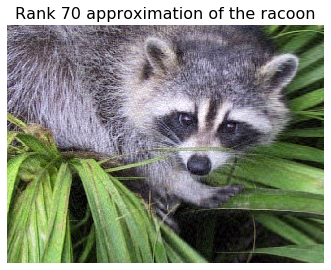

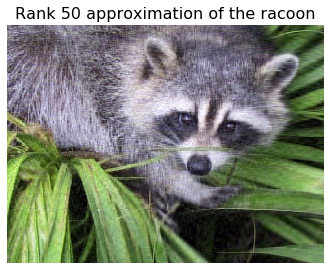

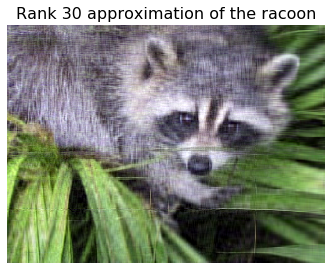

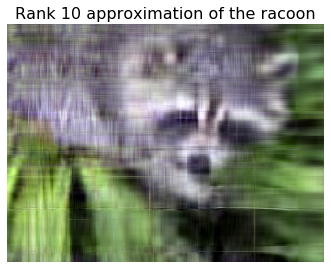

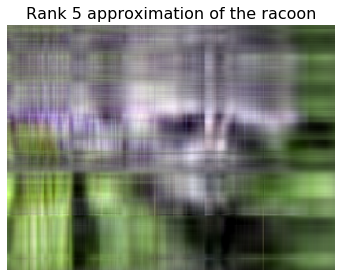

In [109]:
ranks = [100, 70, 50, 30, 10, 5]
n_ranks = len(ranks)
for i, r in enumerate(ranks):
    X_r = compute_approx(X, r)
    # plt.subplot(n_ranks, 1, i + 1)
    plt.figure(figsize=(5, 5))
    plt.imshow(X_r)
    _ = plt.axis('off')
    plt.title('Rank %d approximation of the racoon' % r, fontsize=16)
    plt.tight_layout()